In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_cleveland_upload.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
### Checking data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df["age"].unique()

array([69, 66, 65, 64, 63, 61, 60, 59, 58, 56, 52, 51, 45, 42, 40, 38, 34,
       74, 71, 70, 62, 57, 55, 54, 50, 49, 48, 46, 44, 41, 35, 29, 76, 68,
       67, 53, 47, 43, 39, 37, 77])

In [6]:
### Checking for missing values
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [7]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [8]:
### Dropping the sex attribute
### The sex feature is not very useful in this example, as the sex of the person is not related
df.drop("sex", axis=1, inplace=True)

In [9]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,0,110,211,0,2,144,1,1.8,1,0,0,0


In [10]:
### Also dropping the fbs attribute
df.drop("fbs", axis=1, inplace=True)

In [11]:
df.head()

,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,0,160,234,2,131,0,0.1,1,1,0,0
1,69,0,140,239,0,151,0,1.8,0,2,0,0
2,66,0,150,226,0,114,0,2.6,2,0,0,0
3,65,0,138,282,2,174,0,1.4,1,1,0,1
4,64,0,110,211,2,144,1,1.8,1,0,0,0


In [12]:
### Dropping the restecg attribute
df.drop("restecg", axis=1, inplace=True)

In [13]:
df.head()

,age,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,0,160,234,131,0,0.1,1,1,0,0
1,69,0,140,239,151,0,1.8,0,2,0,0
2,66,0,150,226,114,0,2.6,2,0,0,0
3,65,0,138,282,174,0,1.4,1,1,0,1
4,64,0,110,211,144,1,1.8,1,0,0,0


#### I have done some data cleaning and the data is pretty ready for training

In [14]:
### Splitting the data into training and test sets
from sklearn.model_selection import train_test_split

In [ ]:
### Dividing the dataset into dependent and independent features
X = df.drop("condition", axis=1)
y = df["condition"]

In [34]:
X.info()
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   cp        297 non-null    int64  
 2   trestbps  297 non-null    int64  
 3   chol      297 non-null    int64  
 4   thalach   297 non-null    int64  
 5   exang     297 non-null    int64  
 6   oldpeak   297 non-null    float64
 7   slope     297 non-null    int64  
 8   ca        297 non-null    int64  
 9   thal      297 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 297 entries, 0 to 296
Series name: condition
Non-Null Count  Dtype
--------------  -----
297 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB
None


In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
x_train.shape
print(y_train.shape)

(207,)


In [39]:
### Model Selection
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
model.fit(x_train, y_train)

c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = model.predict(x_test)

In [42]:
print(y_pred)

[1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0
 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0]


In [43]:
#### Performance Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
score = accuracy_score(y_test, y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cls_report = classification_report(y_test, y_pred)
print(cls_report)

0.8333333333333334
[[42  6]
 [ 9 33]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        48
           1       0.85      0.79      0.81        42

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



#### Hyperparameter Tuning and Cross Validation

In [45]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [46]:
params = dict(penalty = penalty, C = c_values, solver = solver)

In [47]:
#### Using the GridSearchCV method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [48]:
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring="accuracy")

In [49]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [50]:
grid.fit(x_train, y_train)

c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [51]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [52]:
y_pred = grid.predict(x_test)

In [53]:
score = accuracy_score(y_test, y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cls_report = classification_report(y_test, y_pred)
print(cls_report)

0.8333333333333334
[[42  6]
 [ 9 33]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        48
           1       0.85      0.79      0.81        42

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



In [54]:
#### Also using the RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [55]:
randomCV = RandomizedSearchCV(estimator=model, param_distributions=params, cv = 5, scoring="accuracy")

In [56]:
randomCV.fit(x_train, y_train)

c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [57]:
print(randomCV.best_score_)

0.859698025551684


In [58]:
print(randomCV.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}


In [60]:
y_pred = randomCV.predict(x_test)

In [61]:
score = accuracy_score(y_test, y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cls_report = classification_report(y_test, y_pred)
print(cls_report)

0.8222222222222222
[[42  6]
 [10 32]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.84      0.76      0.80        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



In [68]:
model.fit(x_train, y_train)

c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_prob = model.predict_proba(x_test)[:,1]

In [70]:
y_prob

array([0.96099997, 0.61513157, 0.31732968, 0.04367411, 0.37615582,
       0.27450444, 0.99622422, 0.98840156, 0.94570849, 0.06291667,
       0.20182146, 0.65930156, 0.32785147, 0.04341526, 0.10411941,
       0.50010223, 0.97257297, 0.08554271, 0.93986308, 0.03043889,
       0.94128961, 0.49719749, 0.01734627, 0.03985916, 0.03320716,
       0.95397833, 0.95211137, 0.99942409, 0.48255934, 0.78164791,
       0.51960422, 0.98342527, 0.41809203, 0.25764276, 0.73831947,
       0.98733706, 0.47022319, 0.14344775, 0.98440399, 0.19022127,
       0.04765797, 0.72792953, 0.30012093, 0.17936326, 0.06582003,
       0.8813366 , 0.13730614, 0.93203636, 0.9327328 , 0.09531878,
       0.27110634, 0.89523583, 0.14670081, 0.47993379, 0.97739677,
       0.32787684, 0.06377864, 0.93628533, 0.41449729, 0.67474035,
       0.9965635 , 0.85551616, 0.04327615, 0.01839932, 0.99261178,
       0.05313847, 0.10732587, 0.97551263, 0.29591838, 0.99234889,
       0.2856821 , 0.14299846, 0.9192147 , 0.28430082, 0.83309

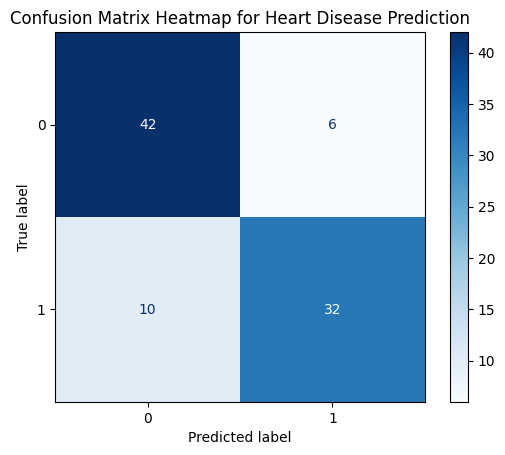

In [62]:
### Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix Heatmap for Heart Disease Prediction")
plt.show()

In [63]:
### ROC_Curve and AUC Score
from sklearn.metrics import roc_curve, roc_auc_score

In [71]:
### Computing the ROC Score
dummy_model_auc = roc_auc_score(y_test, y_prob)
model_auc = roc_auc_score(y_test, y_pred)

print(dummy_model_auc)
print(model_auc)

0.8893849206349207
0.8184523809523809


In [73]:
dummy_model_prob = [0 for _ in range(len(y_test))]      ### We created a dummy model with 0 as the default output
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [74]:
### ROC Curve
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, y_prob)
print(thresholds)

[       inf 0.99942409 0.98583229 0.98440399 0.95211137 0.94570849
 0.93628533 0.9327328  0.83309586 0.80503559 0.67474035 0.65930156
 0.61513157 0.51960422 0.49719749 0.41449729 0.40514382 0.3559241
 0.32787684 0.30012093 0.2856821  0.27450444 0.27110634 0.17936326
 0.14670081 0.09531878 0.08554271 0.06829276 0.06582003 0.01384158]


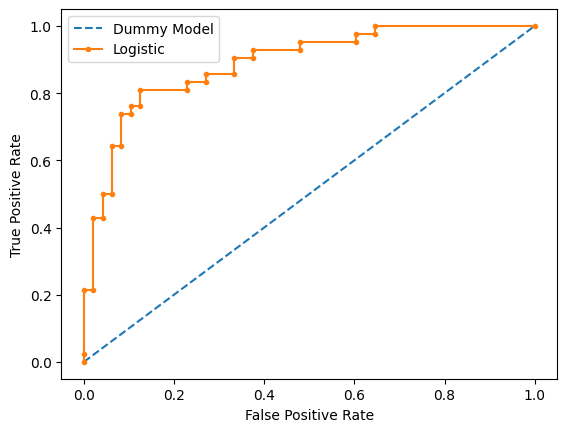

In [75]:
plt.plot(dummy_fpr, dummy_tpr, linestyle = '--', label= 'Dummy Model')
plt.plot(model_fpr, model_tpr, marker = '.', label= 'Logistic')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()